In [6]:
%load_ext autoreload
%autoreload 1
%aimport ecg_get_data
%aimport Models
%aimport train_test_validat
%aimport self_attention
%aimport ECGplot
import Models 
from train_test_validat import *
from self_attention import *
import  ecg_get_data 
import ECGplot

import torch
import torch.utils.data as Data
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
test_npy_path =  './data/test/' #路径
xml_path = './xml/xml/'
lead_index = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
EcgChannles_num = 12
EcgLength_num = 5000
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(DEVICE)

cuda:0


In [39]:
test_Dataset = ecg_get_data.ECG_Dataset(test_npy_path,EcgChannles_num,EcgLength_num,xml_folder=xml_path)

npys:{%d} 100


In [56]:
testmodel = Models.channels_split_ATT_CNN(mark=True).to(DEVICE)
testmodel.load_state_dict(torch.load("./model/20221006_145335/parameter_best_model_2.pt"))

<All keys matched successfully>

In [58]:
TEST_BATCH_SIZE = test_Dataset.npys.__len__()
test_dataloader = Data.DataLoader(dataset=test_Dataset, batch_size=TEST_BATCH_SIZE)
test_acc = []   
criterion = torch.nn.CrossEntropyLoss() 
test_loss,test_acc = test_model(test_dataloader,criterion,testmodel,DEVICE) # 测试模型
print(test_loss,test_acc)
    
#attention_value_lead = MaxMinNormalization(attention_value_lead,attention_value_lead.max(),attention_value_lead.min())

0.5783207416534424 0.79


In [21]:
itme = 2
inputs,labels = test_Dataset.__getitem__(itme)
inputs = inputs.unsqueeze(0)
inputs = inputs.to(DEVICE)
labels = labels.to(DEVICE)  
outputs = testmodel(inputs)
_,pred = outputs.max(1) # 求概率最大值对应的标签
attention_matrix1 = np.zeros((12,1250,1250))
attention_matrix2 = np.zeros((12,1250,1250))
attention_matrix1[0] = (((testmodel.att1v_1.to('cpu'))[0]).detach().numpy())
attention_matrix1[1] = (((testmodel.att2v_1.to('cpu'))[0]).detach().numpy())
attention_matrix1[2] = (((testmodel.att3v_1.to('cpu'))[0]).detach().numpy())
attention_matrix1[3] = (((testmodel.att4v_1.to('cpu'))[0]).detach().numpy())
attention_matrix1[4] = (((testmodel.att5v_1.to('cpu'))[0]).detach().numpy())
attention_matrix1[5] = (((testmodel.att6v_1.to('cpu'))[0]).detach().numpy())
attention_matrix1[6] = (((testmodel.att7v_1.to('cpu'))[0]).detach().numpy())
attention_matrix1[7] = (((testmodel.att8v_1.to('cpu'))[0]).detach().numpy())
attention_matrix1[8] = (((testmodel.att9v_1.to('cpu'))[0]).detach().numpy())
attention_matrix1[9] = (((testmodel.att10v_1.to('cpu'))[0]).detach().numpy())
attention_matrix1[10] = (((testmodel.att11v_1.to('cpu'))[0]).detach().numpy())
attention_matrix1[11] = (((testmodel.att12v_1.to('cpu'))[0]).detach().numpy())

attention_matrix2[0] = (((testmodel.att1v_2.to('cpu'))[0]).detach().numpy())
attention_matrix2[1] = (((testmodel.att2v_2.to('cpu'))[0]).detach().numpy())
attention_matrix2[2] = (((testmodel.att3v_2.to('cpu'))[0]).detach().numpy())
attention_matrix2[3] = (((testmodel.att4v_2.to('cpu'))[0]).detach().numpy())
attention_matrix2[4] = (((testmodel.att5v_2.to('cpu'))[0]).detach().numpy())
attention_matrix2[5] = (((testmodel.att6v_2.to('cpu'))[0]).detach().numpy())
attention_matrix2[6] = (((testmodel.att7v_2.to('cpu'))[0]).detach().numpy())
attention_matrix2[7] = (((testmodel.att8v_2.to('cpu'))[0]).detach().numpy())
attention_matrix2[8] = (((testmodel.att9v_2.to('cpu'))[0]).detach().numpy())
attention_matrix2[9] = (((testmodel.att10v_2.to('cpu'))[0]).detach().numpy())
attention_matrix2[10] = (((testmodel.att11v_2.to('cpu'))[0]).detach().numpy())
attention_matrix2[11] = (((testmodel.att12v_2.to('cpu'))[0]).detach().numpy())

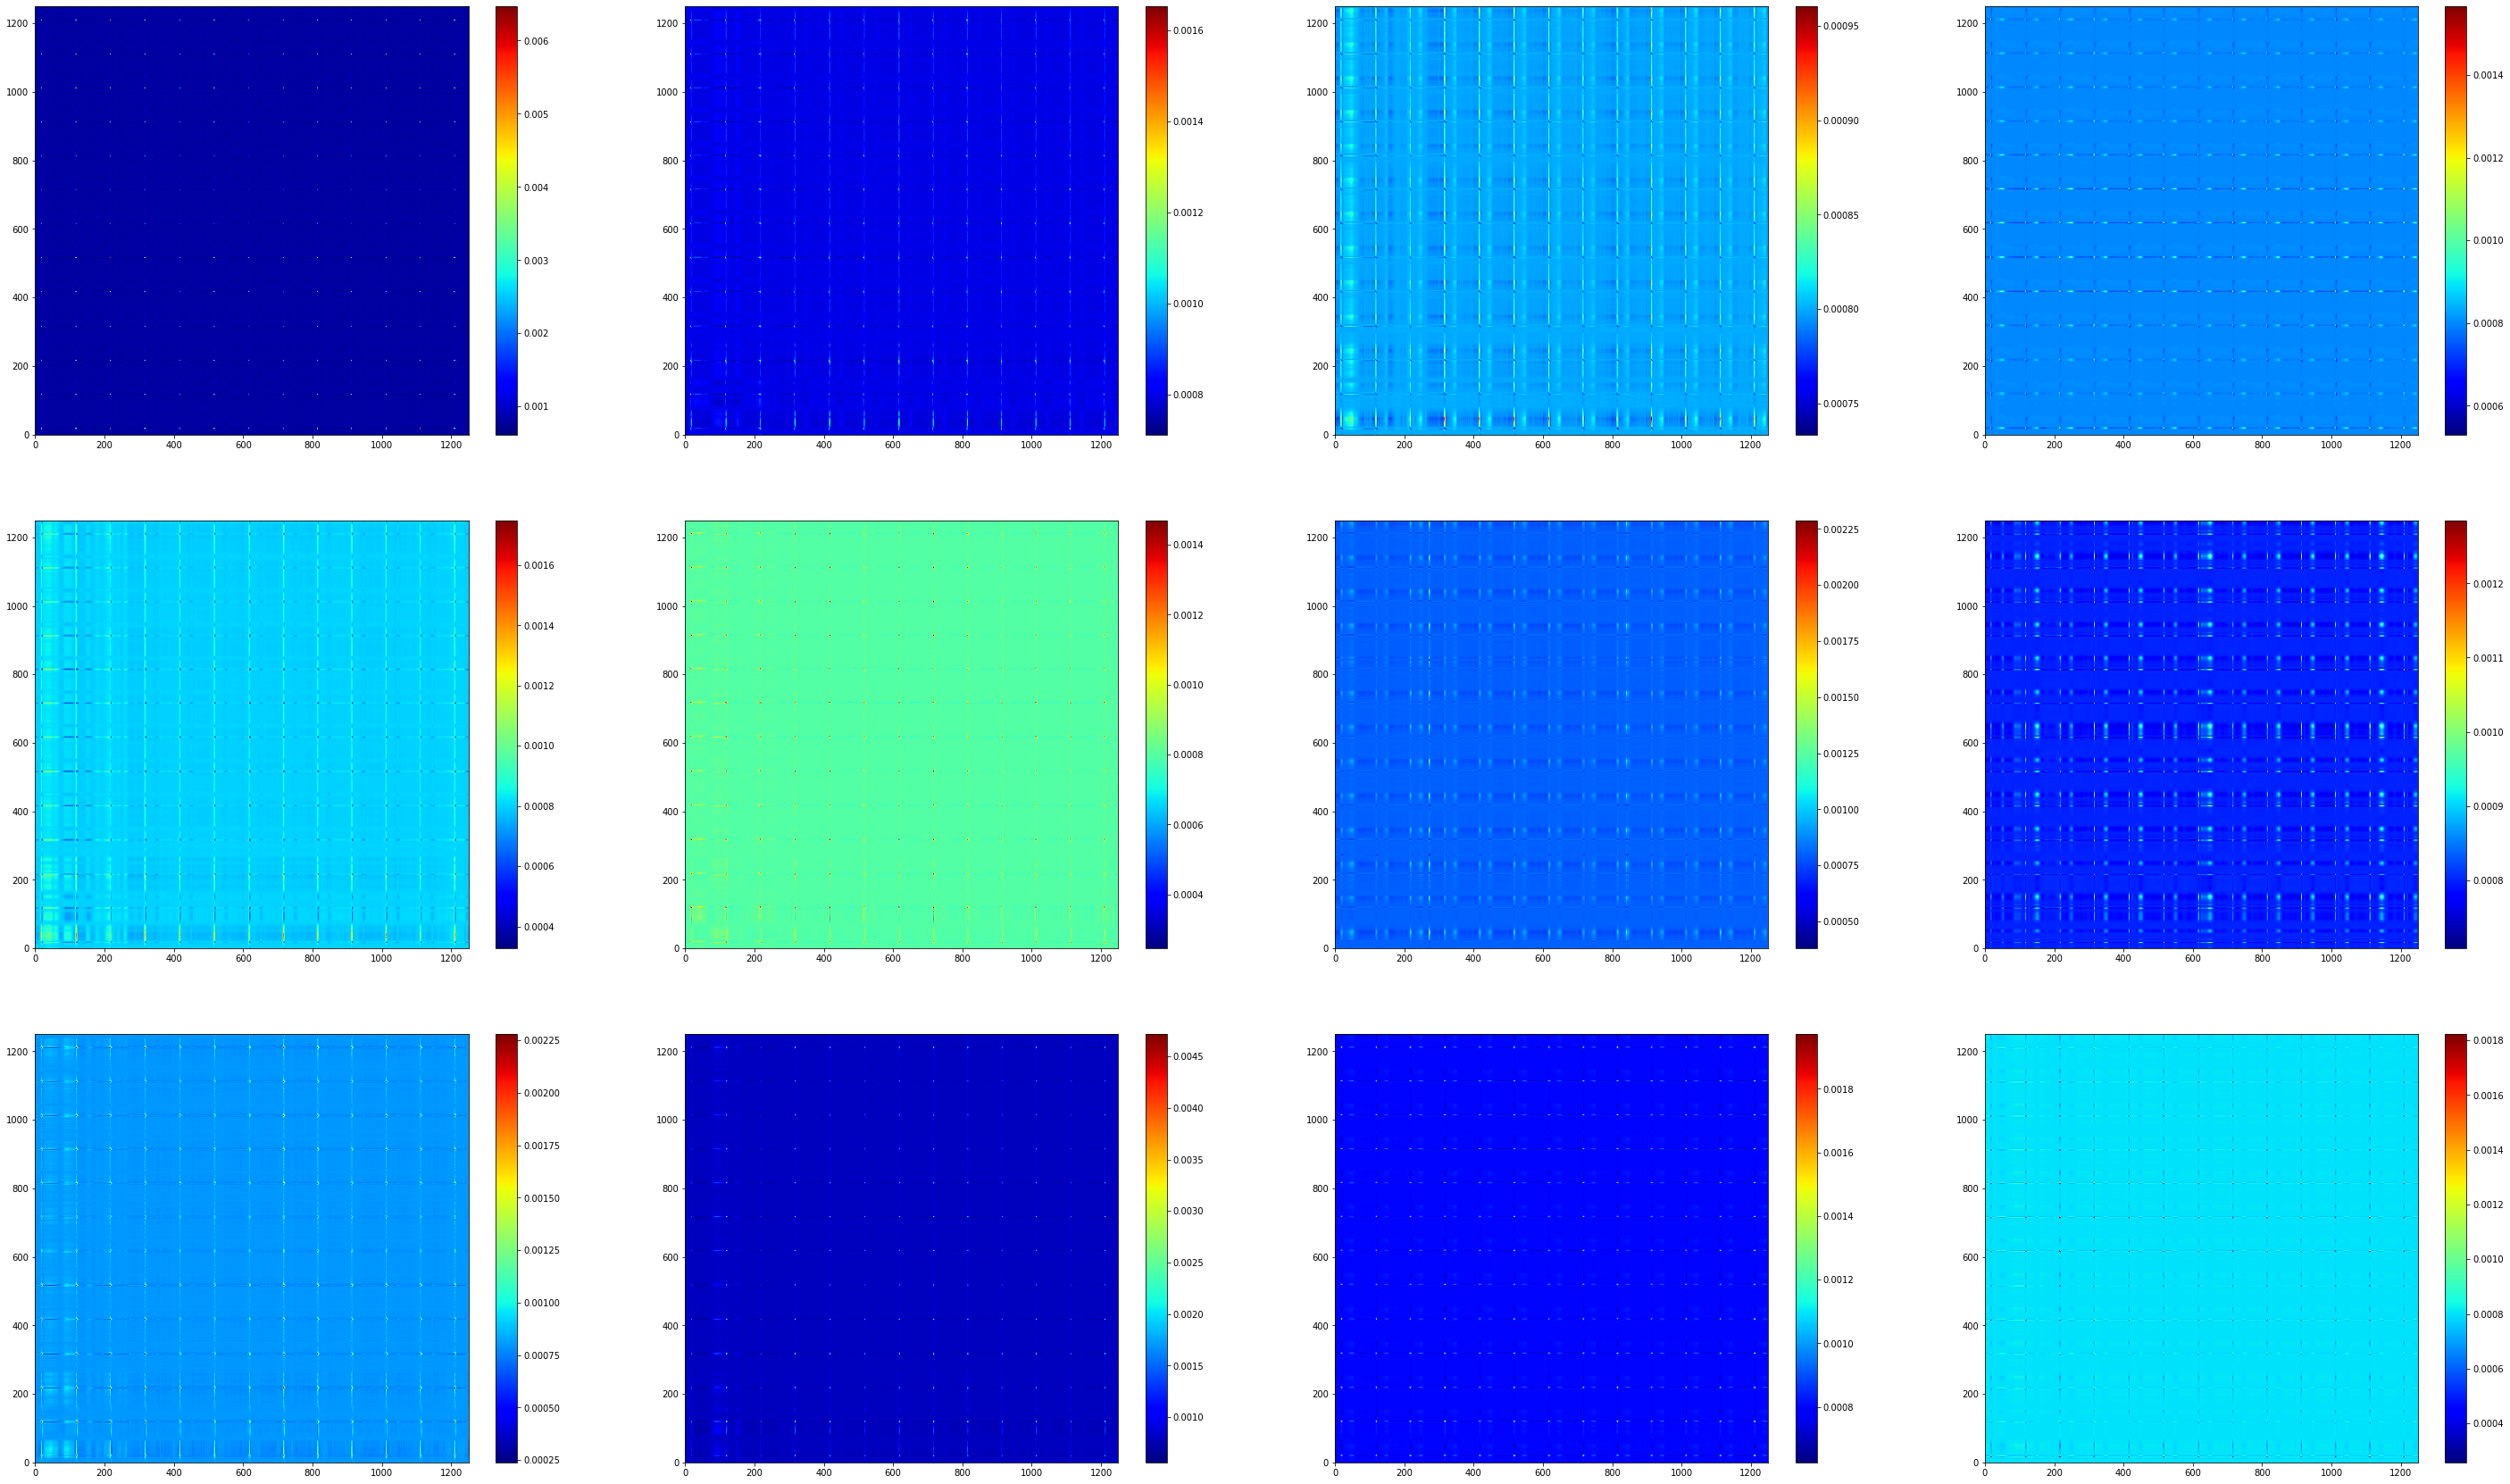

In [22]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(50, 30))
i = 0

for col in range(4):
    for row in range(3):
        ax = axs[row, col]
        pcm = ax.pcolormesh(attention_matrix1[i],cmap='jet')
        fig.colorbar(pcm, ax=ax)
        i = i+1

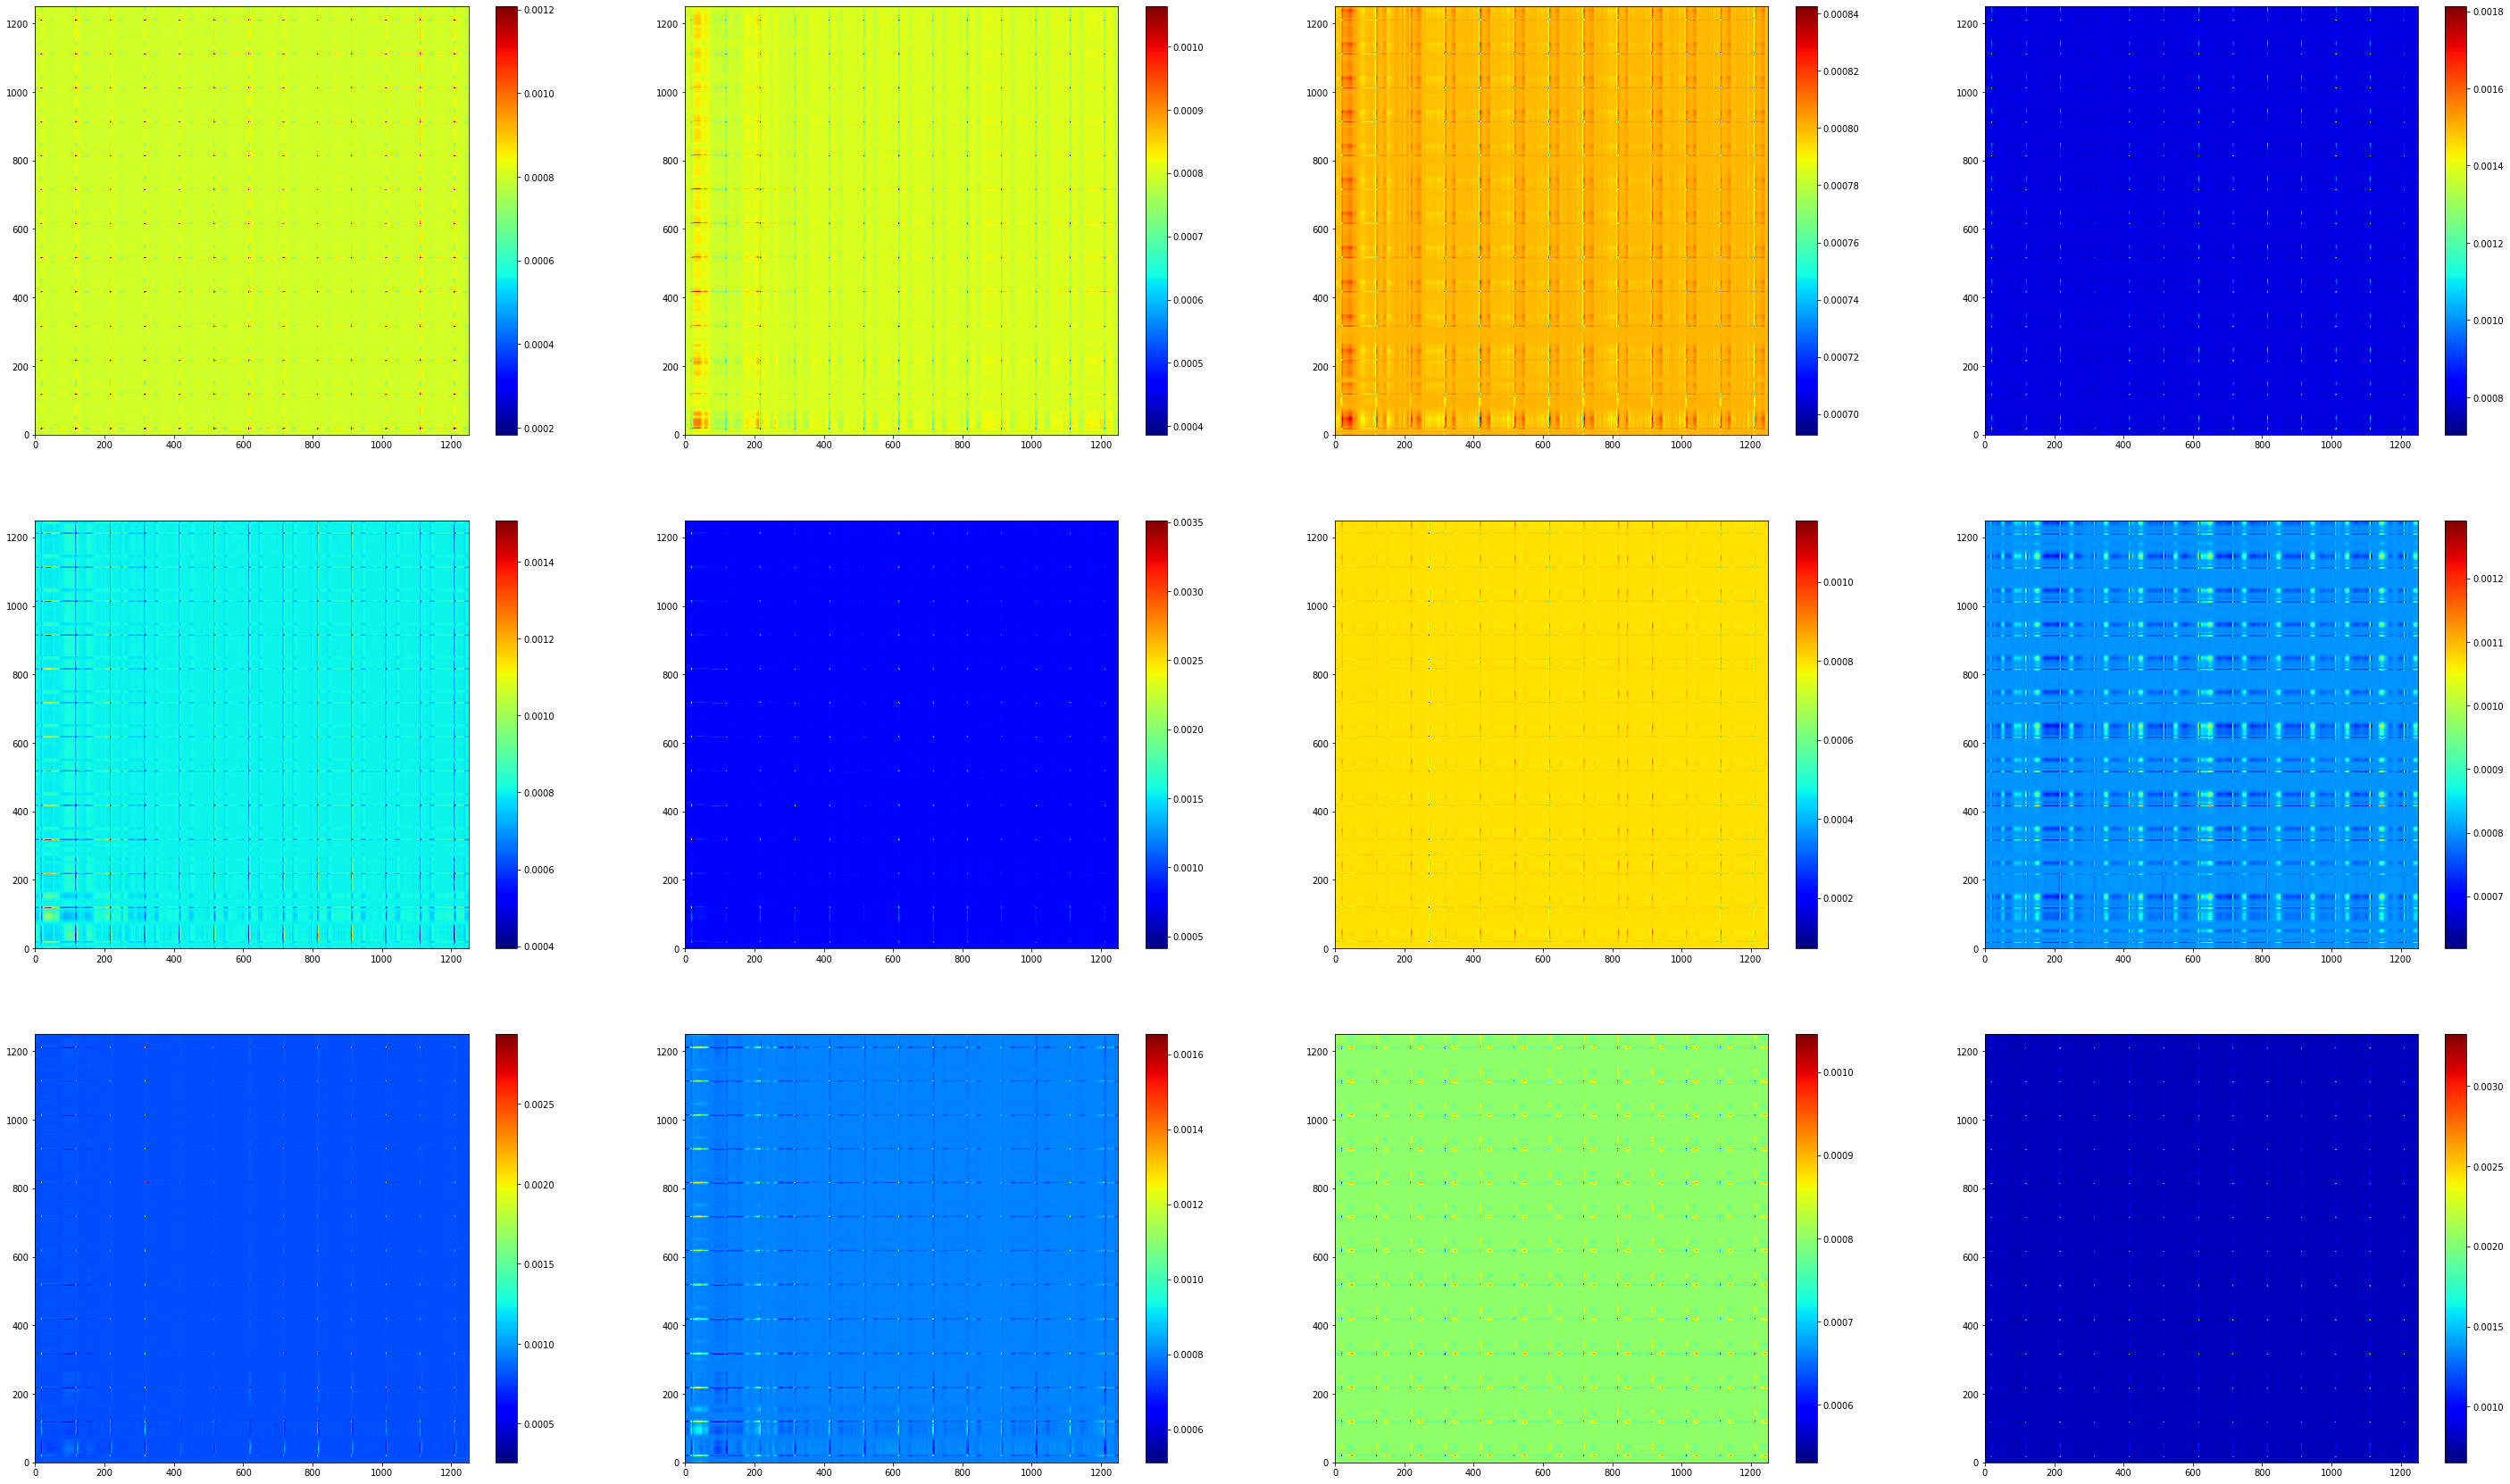

In [23]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(50, 30))
i = 0

for col in range(4):
    for row in range(3):
        ax = axs[row, col]
        pcm = ax.pcolormesh(attention_matrix2[i],cmap='jet')
        fig.colorbar(pcm, ax=ax)
        i = i+1

In [ ]:
itme = 2
inputs,labels = test_Dataset.__getitem__(itme)
inputs = inputs.unsqueeze(0)
inputs = inputs.to(DEVICE)
labels = labels.to(DEVICE)  
outputs = testmodel(inputs)
_,pred = outputs.max(1) # 求概率最大值对应的标签
attention_matrix = np.zeros((12,1250,1250))
attention_matrix[0] = (((testmodel.attv1.to('cpu'))[0]).detach().numpy())
attention_matrix[1] = (((testmodel.attv2.to('cpu'))[0]).detach().numpy())
attention_matrix[2] = (((testmodel.attv3.to('cpu'))[0]).detach().numpy())
attention_matrix[3] = (((testmodel.attv4.to('cpu'))[0]).detach().numpy())
attention_matrix[4] = (((testmodel.attv5.to('cpu'))[0]).detach().numpy())
attention_matrix[5] = (((testmodel.attv6.to('cpu'))[0]).detach().numpy())
attention_matrix[6] = (((testmodel.attv7.to('cpu'))[0]).detach().numpy())
attention_matrix[7] = (((testmodel.attv8.to('cpu'))[0]).detach().numpy())
attention_matrix[8] = (((testmodel.attv9.to('cpu'))[0]).detach().numpy())
attention_matrix[9] = (((testmodel.attv10.to('cpu'))[0]).detach().numpy())
attention_matrix[10] = (((testmodel.attv11.to('cpu'))[0]).detach().numpy())
attention_matrix[11] = (((testmodel.attv12.to('cpu'))[0]).detach().numpy())

In [ ]:
attention_value_timestep = np.zeros((len(test_dataloader),12,1250))#5000/4 = 1250
attention_value_timestep[i] = (((test_model.attention_value2.to('cpu'))[0]).detach().numpy()).sum(axis=0) #将得到的attention矩阵(5000,5000) 按着每行叠加起来，得到（5000，）的attention值
attention_value_timestep[i]

In [ ]:
attention_value__each_timestep = np.zeros(EcgLength_num,)
factor = int(EcgLength_num/len(attention_value_timestep[0]))
for i in range(0,EcgLength_num,factor):
    if (i/factor)>=len(attention_value_timestep[0]):
        break
    attention_value__each_timestep[i:i+factor] = attention_value_timestep[0][int(i/factor)]
x_index = np.arange(0,EcgLength_num)
fig, axs = plt.subplots(nrows=12, ncols=1, sharex=True,sharey=True,figsize=(90,40), constrained_layout=True)
for i,ax in enumerate(axs.flat):  # type: ignore
    #plot_y = x[1,i,:]*(4.88)
    plot_y = np.array(test_x[0,i,:])*4.88
    ECGplot.plot_multicolored_line(fig,ax,x = x_index,y= plot_y,color_depend=attention_value__each_timestep,cmap="turbo",y_name = str(lead_index[i])+" Voltage(mV)"
                                        ,title = lead_index[i])

In [ ]:
from pathlib import Path
from tqdm import tqdm
file_path = Path("./xml/xml")
file_list = list(file_path.glob('*.xml')) # list(images_path.glob('*.png'))
file_list =[str(x) for x in file_list]
file_list.sort(key=lambda x:int(x.split('/')[-1].split('_')[0])) #按“/”分割，取最后一个，并把最后后一个按'_'分割，
                                                                 #按'_'分割后再取第0个，即为编号，按此排序
for file in tqdm(file_list):
    ecg = ecg_get_data.get_ECG_form_xml(file,12,5000)
    np.save('./npy_ECG_int/'+(file.split('/')[-1].split('.')[0])+".npy",ecg)

In [ ]:
file_path = Path("./xml/NHTN/")
file_list = list(file_path.glob('*.xml')) # list(images_path.glob('*.png'))
file_list =[str(x) for x in file_list]
file_list.sort(key=lambda x:int(x.split('/')[-1].split('_')[0])) #按“/”分割，取最后一个，并把最后后一个按'_'分割，
                                                                 #按'_'分割后再取第0个，即为编号，按此排序
for file in tqdm(file_list):
    ecg = ecg_get_data.get_ECG_form_xml(file,12,5000)
    np.save('./npy_ECG_int/'+(file.split('/')[-1].split('.')[0])+".npy",ecg)

In [ ]:
import torch
a = torch.zeros((32, 8, 96, 64))
print((a.unsqueeze(-2)).shape)

In [ ]:
a = torch.zeros((32, 8, 96))
print((a.topk(3)))